# Sensor Input to Freshness


In [ ]:
import streamlit as st
import numpy as np

In [ ]:
def determine_freshness(color_reading, firmness_reading, sugar_content, weight):
    color_score = 0
    firmness_score = 0
    sugar_score = 0
    weight_score = 0

    # Calculate color score (assuming higher value is fresher)
    if color_reading >= 0.7:  # Example threshold for ripe red color
        color_score = 1
    elif color_reading >= 0.5:  # Example threshold for unripe color
        color_score = 0.5
    else:
        color_score = 0

    # Calculate firmness score (assuming higher value is fresher)
    if firmness_reading >= 50:  # Example threshold for firmness
        firmness_score = 1
    else:
        firmness_score = 0

    # Calculate sugar content score (assuming higher value is fresher)
    if sugar_content >= 0.1:  # Example threshold for sugar content
        sugar_score = 1
    else:
        sugar_score = 0

    # Calculate weight score (assuming heavier is fresher)
    if weight >= 150:  # Example threshold for weight
        weight_score = 1
    else:
        weight_score = 0

    # Calculate overall freshness score
    freshness_score = (color_score + firmness_score + sugar_score + weight_score) / 4

    return freshness_score

# Example sensor readings
color_reading = 0.8  # Example color reading (0 to 1, where 1 is ripe red)
firmness_reading = 45  # Example firmness reading (units depend on sensor)
sugar_content = 0.15  # Example sugar content reading (0 to 1, where 1 is high sugar content)
weight = 160  # Example weight reading (grams)

# Determine freshness
freshness_score = determine_freshness(color_reading, firmness_reading, sugar_content, weight)
print("Freshness score:", freshness_score)

# Function to categorize tomatoes based on quality
def categorize_tomatoes(quality_score):
    if quality_score < 0.1:
        return "Slot 1"
    elif quality_score < 0.2:
        return "Slot 2"
    elif quality_score < 0.3:
        return "Slot 3"
    elif quality_score < 0.4:
        return "Slot 4"
    elif quality_score < 0.5:
        return "Slot 5"
    elif quality_score < 0.6:
        return "Slot 6"
    elif quality_score < 0.7:
        return "Slot 7"
    elif quality_score < 0.8:
        return "Slot 8"
    elif quality_score < 0.9:
        return "Slot 9"
    else:
        return "Slot 10"

# Generate random quality scores for tomatoes
tomato_quality_scores = np.random.rand(100)

# Streamlit app
st.title('Tomato Quality Categorization')

# Display the quality scores and the assigned slots
st.write('### Tomato Quality Scores:')
st.write(tomato_quality_scores)

categorized_tomatoes = [categorize_tomatoes(score) for score in tomato_quality_scores]

st.write('### Categorized Tomatoes:')
st.write(categorized_tomatoes)



Freshness score: 0.75


# Code for website of prediction


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


2024-02-29 19:34:31.085 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

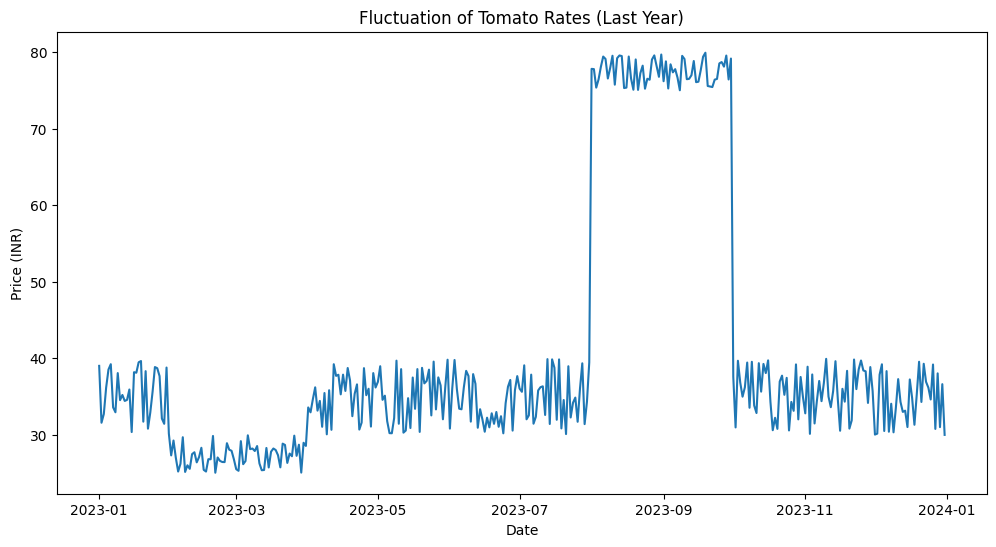

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Generate data for tomato prices with specified variations
def generate_data():
    dates = pd.date_range('2023-01-01', periods=365, freq='D')
    prices = np.zeros(365)
    for i, date in enumerate(dates):
        month = date.month
        if month in [2, 3]:
            prices[i] = np.random.uniform(25, 30)  # Lower rates in Feb and Mar
        elif month in [8, 9]:
            prices[i] = np.random.uniform(75, 80)  # Higher rates in Aug and Sep
        else:
            prices[i] = np.random.uniform(30, 40)  # Default rates

        # Special cases for tomorrow, next month, and 6 months
        if date == dates[-1]:
            prices[i] = 30
        elif date + pd.DateOffset(months=1) == dates[-1]:
            prices[i] = 40
        elif date + pd.DateOffset(months=6) == dates[-1]:
            prices[i] = 80

    return pd.DataFrame({'Date': dates, 'Price': prices})

# Create a DataFrame with random data
df = generate_data()

# Streamlit app
st.title('Tomato Price Prediction')

# Display prices for the next week, month, and 6 months in rupees
next_week_price = df['Price'].iloc[-1] + np.random.uniform(-5, 5)
next_month_price = df['Price'].iloc[-1] + np.random.uniform(-10, 10)
next_six_months_price = df['Price'].iloc[-1] + np.random.uniform(-20, 20)

st.write('### Price Predictions (in Rupees):')
st.write(f'- Next Week: ₹{next_week_price:.2f}')
st.write(f'- Next Month: ₹{next_month_price:.2f}')
st.write(f'- Next 6 Months: ₹{next_six_months_price:.2f}')

# Create a graph for the fluctuation of tomato rates for the last year
st.write('### Fluctuation of Tomato Rates (Last Year):')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price (INR)')
ax.set_title('Fluctuation of Tomato Rates (Last Year)')
st.pyplot(fig)


In [ ]:
!ls


sample_data
